In [1]:
import boto3
import pickle
import matplotlib as plt
import pandas as pd

import statsmodels.formula.api as smf
from sklearn.preprocessing import StandardScaler
import matplotlib.dates as mdates

%matplotlib inline

In [2]:
bucket_name = 'tfl-cycle-data'
s3_file_path = 'Docking_station_data/Waterloo-Jan2016-Apr2024.pkl'
notebook_file_path = 'temp/Waterloo-Jan2016-Apr2024.pkl'
s3 = boto3.client('s3')

s3.download_file(bucket_name, s3_file_path, notebook_file_path)

In [3]:
with open(notebook_file_path, 'rb') as f:
    waterloo_df = pickle.load(f)

In [4]:
waterloo_df.head()

,Rental ID,Start Date,Start Station Name,End Date,End Station Name
0,50755276,2016-10-01 08:41:00,"William IV Street, Strand",2016-10-01 08:47:00,"Waterloo Station 3, Waterloo"
1,50755420,2016-10-01 09:05:00,"Bermondsey Street, Bermondsey",2016-10-01 09:15:00,"Waterloo Station 3, Waterloo"
2,50755598,2016-10-01 09:28:00,"Lollard Street, Vauxhall",2016-10-01 09:36:00,"Waterloo Station 3, Waterloo"
3,50755603,2016-10-01 09:28:00,"Lollard Street, Vauxhall",2016-10-01 09:36:00,"Waterloo Station 3, Waterloo"
4,50756101,2016-10-01 10:12:00,"Waterloo Station 3, Waterloo",2016-10-01 10:27:00,"Braham Street, Aldgate"


In [5]:
waterloo_df_out = waterloo_df[waterloo_df['Start Station Name'] == 'Waterloo Station 3, Waterloo']
waterloo_df_in = waterloo_df[waterloo_df['End Station Name'] == 'Waterloo Station 3, Waterloo']

waterloo_df_out.head()

,Rental ID,Start Date,Start Station Name,End Date,End Station Name
4,50756101,2016-10-01 10:12:00,"Waterloo Station 3, Waterloo",2016-10-01 10:27:00,"Braham Street, Aldgate"
7,50758609,2016-10-01 12:24:00,"Waterloo Station 3, Waterloo",2016-10-01 12:39:00,"Kennington Oval, Oval"
8,50759951,2016-10-01 13:10:00,"Waterloo Station 3, Waterloo",2016-10-01 13:56:00,"Eversholt Street , Camden Town"
9,50759954,2016-10-01 13:10:00,"Waterloo Station 3, Waterloo",2016-10-01 13:56:00,"Eversholt Street , Camden Town"
10,50759977,2016-10-01 13:11:00,"Waterloo Station 3, Waterloo",2016-10-01 13:56:00,"Eversholt Street , Camden Town"


In [6]:
waterloo_df_out = waterloo_df[waterloo_df['Start Station Name'] == 'Waterloo Station 3, Waterloo']

waterloo_df_out.set_index('Start Date', inplace=True)
rentals_5min = waterloo_df_out.resample('5min').size().reset_index(name='Rentals')

rentals_5min.head(10)

,Start Date,Rentals
0,2015-01-02 01:45:00,1
1,2015-01-02 01:50:00,0
2,2015-01-02 01:55:00,0
3,2015-01-02 02:00:00,0
4,2015-01-02 02:05:00,0
5,2015-01-02 02:10:00,0
6,2015-01-02 02:15:00,0
7,2015-01-02 02:20:00,0
8,2015-01-02 02:25:00,0
9,2015-01-02 02:30:00,0


<Axes: xlabel='Start Date', ylabel='Rentals'>

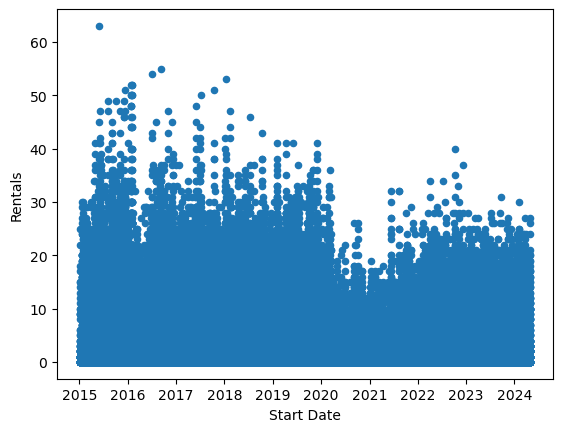

In [7]:

rentals_5min.plot.scatter(x='Start Date', y='Rentals')

In [8]:
rentals_5min['Time_Interval'] = (rentals_5min['Start Date'] - rentals_5min['Start Date'].min()).dt.total_seconds() / 60
scaler = StandardScaler()
rentals_5min['Time_Interval_Std'] = scaler.fit_transform(rentals_5min[['Time_Interval']])

rentals_5min.head()

,Start Date,Rentals,Time_Interval,Time_Interval_Std
0,2015-01-02 01:45:00,1,0.0,-1.732049
1,2015-01-02 01:50:00,0,5.0,-1.732046
2,2015-01-02 01:55:00,0,10.0,-1.732042
3,2015-01-02 02:00:00,0,15.0,-1.732038
4,2015-01-02 02:05:00,0,20.0,-1.732035


### Below are failed experiments to model using poisson model - I think multivariate?

In [9]:
# # Fitting the Poisson regression model
# poisson_model = smf.poisson('Rentals ~ Time_Interval_Std', data=rentals_5min).fit()

In [10]:
# # Displaying the summary of the model
# poisson_model_std_summary = poisson_model.summary()
# print(poisson_model_std_summary)

In [11]:
# # Create future time intervals for the next 24 hours
# future_intervals = pd.date_range(start=rentals_5min['Start Date'].max(), periods=24*12, freq='5min')
# future_intervals_df = pd.DataFrame({'Start Date': future_intervals})

# # Standardize the future intervals
# future_intervals_df['Time_Interval'] = (future_intervals_df['Start Date'] - rentals_5min['Start Date'].min()).dt.total_seconds() / 60
# future_intervals_df['Time_Interval_Std'] = scaler.transform(future_intervals_df[['Time_Interval']])

# # Predict the rental rates for future intervals
# future_intervals_df['Predicted_Rentals'] = poisson_model.predict(future_intervals_df[['Time_Interval_Std']])
# future_intervals_df.head()

In [12]:
# future_intervals_df.plot.scatter(x='Start Date', y='Predicted_Rentals')

In [13]:
# # Add hour and day of the week to the dataset
# rentals_5min['Hour'] = rentals_5min['Start Date'].dt.hour
# rentals_5min['Day_of_Week'] = rentals_5min['Start Date'].dt.dayofweek

# # Fitting the Poisson regression model with new features
# poisson_model_aug = smf.poisson('Rentals ~ Time_Interval_Std + C(Hour) + C(Day_of_Week)', data=rentals_5min).fit()

# # Displaying the summary of the model
# poisson_model_aug_summary = poisson_model_aug.summary()
# print(poisson_model_aug_summary)

In [14]:
# # Create future time intervals for the next 24 hours
# future_intervals = pd.date_range(start=rentals_5min['Start Date'].max(), periods=24*12, freq='5min')
# future_intervals_df = pd.DataFrame({'Start Date': future_intervals})
# future_intervals_df['Hour'] = future_intervals_df['Start Date'].dt.hour
# future_intervals_df['Day_of_Week'] = future_intervals_df['Start Date'].dt.dayofweek

# # Standardize the future intervals
# future_intervals_df['Time_Interval'] = (future_intervals_df['Start Date'] - rentals_5min['Start Date'].min()).dt.total_seconds() / 60
# future_intervals_df['Time_Interval_Std'] = scaler.transform(future_intervals_df[['Time_Interval']])

# # Predict the rental rates for future intervals
# future_intervals_df['Predicted_Rentals'] = poisson_model_aug.predict(future_intervals_df[['Time_Interval_Std', 'Hour', 'Day_of_Week']])
# future_intervals_df.head()

In [15]:
# future_intervals_df.plot.scatter(x='Start Date', y='Predicted_Rentals')

In [16]:
# import statsmodels.api as sm

# # Define the minimum and maximum values for the x-axis
# xmin = pd.to_datetime('2024-05-01 06:00')
# xmax = pd.to_datetime('2024-05-01 12:00')

# # Convert these dates to numerical format for setting limits
# xmin_numeric = mdates.date2num(xmin)
# xmax_numeric = mdates.date2num(xmax)

# # Convert Start Date to numerical format for plotting
# future_intervals_df['Start Date Numeric'] = mdates.date2num(future_intervals_df['Start Date'])

# # Create the plot
# plt.figure(figsize=(12, 6))
# sns.scatterplot(x='Start Date', y='Predicted_Rentals', data=future_intervals_df, label='Predicted Rentals')

# # Adding a smooth line using LOWESS (Locally Weighted Scatterplot Smoothing)
# lowess = sm.nonparametric.lowess
# smoothed = lowess(future_intervals_df['Predicted_Rentals'], future_intervals_df['Start Date Numeric'], frac=0.1)

# plt.plot(mdates.num2date(smoothed[:, 0]), smoothed[:, 1], color='red', label='Trend Line')

# # Add title and labels
# plt.title('Predicted Rentals Over Time')
# plt.xlabel('Start Date')
# plt.ylabel('Predicted Rentals')
# plt.legend()

# # Rotate x-axis labels for better readability
# plt.xticks(rotation=45)

# # Set x-axis limits
# plt.gca().set_xlim(xmin, xmax)

# # Format x-axis to show dates
# plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M'))
# plt.gca().xaxis.set_major_locator(mdates.HourLocator(interval=6))

# # Show the plot
# plt.show()

I THINK IT MAY BE BREAKING BECAUSE THERE ARE TOO MANY PARAMETERS IE ONE FOR EVERY 5 MINUTE PERIOD IN 24 HOURS - 720. ANOTHER MODELING METHOD REQUIRED!

In [ ]:
# # Add hour and day of the week to the dataset
# rentals_5min['Day_of_Week'] = rentals_5min['Start Date'].dt.dayofweek
# rentals_5min['Hour'] = rentals_5min['Start Date'].dt.hour
# rentals_5min['Minute'] = rentals_5min['Start Date'].dt.minute
# rentals_5min['MinuteHour'] = 60*rentals_5min['Hour'].astype(int) + rentals_5min['Minute'].astype(int)

# # Ensure Hour and Day_of_Week are categories
# rentals_5min['Hour'] = rentals_5min['Hour'].astype('category')
# rentals_5min['Day_of_Week'] = rentals_5min['Day_of_Week'].astype('category')
# rentals_5min['Minute'] = rentals_5min['Minute'].astype('category')
# rentals_5min['MinuteHour'] = rentals_5min['MinuteHour'].astype('category')

# # # Create spline terms for the training data
# # spline_features = dmatrix("cr(Time_Interval_Std, df=5) + C(Day_of_Week) + C(MinuteHour)", data=rentals_5min, return_type='dataframe')
# # response = rentals_5min['Rentals']

# # # Fit the Poisson model
# # poisson_model_spline = sm.GLM(response, spline_features, family=sm.families.Poisson()).fit()

# # # Create spline terms for future intervals
# # future_spline_features = dmatrix("cr(Time_Interval_Std, df=5) + C(Hour) + C(Day_of_Week) + C(Minute)", data=future_intervals_df, return_type='dataframe')

# # # Predict using the spline Poisson model
# # future_intervals_df['Predicted_Rentals'] = poisson_model_spline.predict(future_spline_features)

# # Fitting the Poisson regression model with new features
# poisson_model_aug2 = smf.poisson('Rentals ~ Time_Interval_Std + C(Day_of_Week) + C(MinuteHour)', data=rentals_5min).fit()

# # Displaying the summary of the model
# poisson_model_aug_summary2 = poisson_model_aug2.summary()
# print(poisson_model_aug_summary2)

In [ ]:
# # Create future time intervals for the next 24 hours
# future_intervals = pd.date_range(start=rentals_5min['Start Date'].max(), periods=24*12, freq='5min')
# future_intervals_df = pd.DataFrame({'Start Date': future_intervals})
# future_intervals_df['Hour'] = future_intervals_df['Start Date'].dt.hour
# future_intervals_df['Day_of_Week'] = future_intervals_df['Start Date'].dt.dayofweek
# future_intervals_df['Minute'] = future_intervals_df['Start Date'].dt.minute
# future_intervals_df['MinuteHour'] = 60*future_intervals_df['Hour'].astype(int) + rentals_5min['Minute'].astype(int)

# # Standardize the future intervals
# future_intervals_df['Time_Interval'] = (future_intervals_df['Start Date'] - rentals_5min['Start Date'].min()).dt.total_seconds() / 60
# future_intervals_df['Time_Interval_Std'] = scaler.transform(future_intervals_df[['Time_Interval']])

# # Predict the rental rates for future intervals
# future_intervals_df['Predicted_Rentals'] = poisson_model_aug2.predict(future_intervals_df[['Time_Interval_Std', 'Day_of_Week', 'MinuteHour']])
# future_intervals_df.head()

In [ ]:
# import statsmodels.api as sm

# # Define the minimum and maximum values for the x-axis
# xmin = pd.to_datetime('2024-05-01 06:00')
# xmax = pd.to_datetime('2024-05-01 12:00')

# # Convert these dates to numerical format for setting limits
# xmin_numeric = mdates.date2num(xmin)
# xmax_numeric = mdates.date2num(xmax)

# # Convert Start Date to numerical format for plotting
# future_intervals_df['Start Date Numeric'] = mdates.date2num(future_intervals_df['Start Date'])

# # Create the plot
# plt.figure(figsize=(12, 6))
# sns.scatterplot(x='Start Date', y='Predicted_Rentals', data=future_intervals_df, label='Predicted Rentals')

# # Adding a smooth line using LOWESS (Locally Weighted Scatterplot Smoothing)
# lowess = sm.nonparametric.lowess
# smoothed = lowess(future_intervals_df['Predicted_Rentals'], future_intervals_df['Start Date Numeric'], frac=0.1)

# plt.plot(mdates.num2date(smoothed[:, 0]), smoothed[:, 1], color='red', label='Trend Line')

# # Add title and labels
# plt.title('Predicted Rentals Over Time')
# plt.xlabel('Start Date')
# plt.ylabel('Predicted Rentals')
# plt.legend()

# # Rotate x-axis labels for better readability
# plt.xticks(rotation=45)

# # Set x-axis limits
# plt.gca().set_xlim(xmin, xmax)

# # Format x-axis to show dates
# plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M'))
# plt.gca().xaxis.set_major_locator(mdates.HourLocator(interval=6))

# # Show the plot
# plt.show()

In [ ]:
rentals_5min['MinuteHour'] = 60*rentals_5min['Hour'].astype(int) + rentals_5min['Minute'].astype(int)
rentals_5min.head()